In [1]:
# First import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:
# Now we need to read in the data
df = pd.read_csv(r"C:\Users\yuxch\Downloads\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
df.isnull().mean() * 100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [4]:
# Formatting 
df["budget"] = pd.to_numeric(df["budget"], errors='coerce')  # Convert to numeric, NaN for invalid values
df["budget"] = df["budget"].fillna(0).astype(int)  # Replace NaN with 0, then convert to int

df["gross"] = pd.to_numeric(df["gross"], errors='coerce')  # Convert to numeric, NaN for invalid values
df["gross"] = df["gross"].fillna(0).astype(int)  # Replace NaN with 0, then convert to int


In [5]:
# Extracting and formatting to have correct 'release year'
df['corrected_year'] = df['released'].astype(str).str.extract(r'(\d{4})')

In [6]:
pd.set_option('display.max_rows', None)  # Show all rows

In [7]:
# Drop duplicates if there is any
df = df.drop_duplicates()

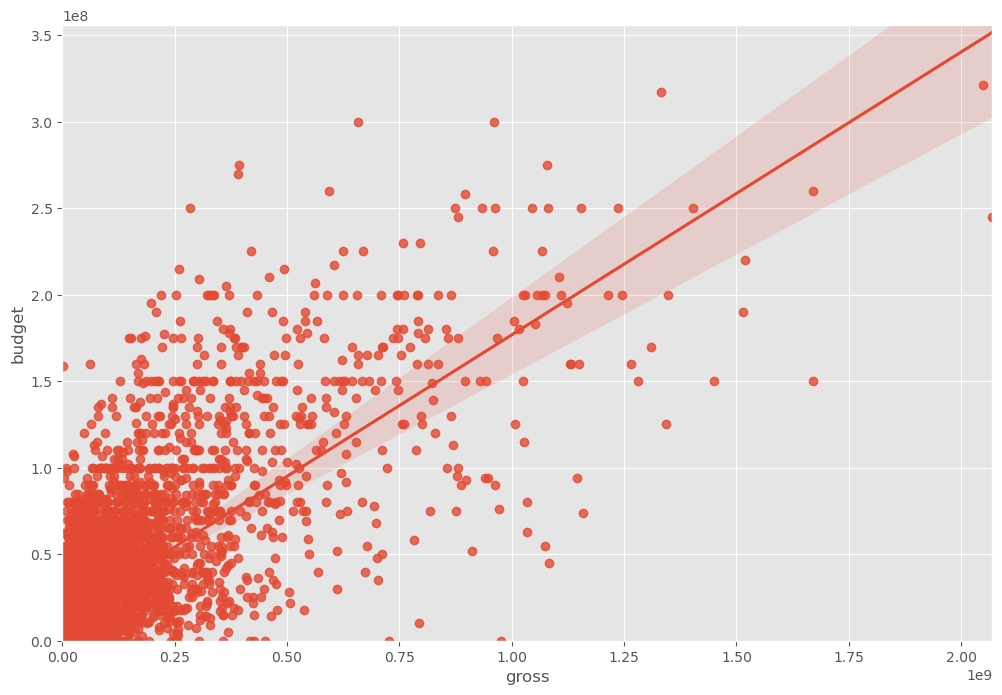

In [8]:
sns.regplot(x="gross", y="budget", data=df)

plt.xlim(0, df["gross"].max())  # Set x-axis range to start from 0
plt.ylim(0, df["budget"].max())  # Set y-axis range to start from 0
plt.show()

In [9]:
# Correlation Matrix between all numeric columns
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


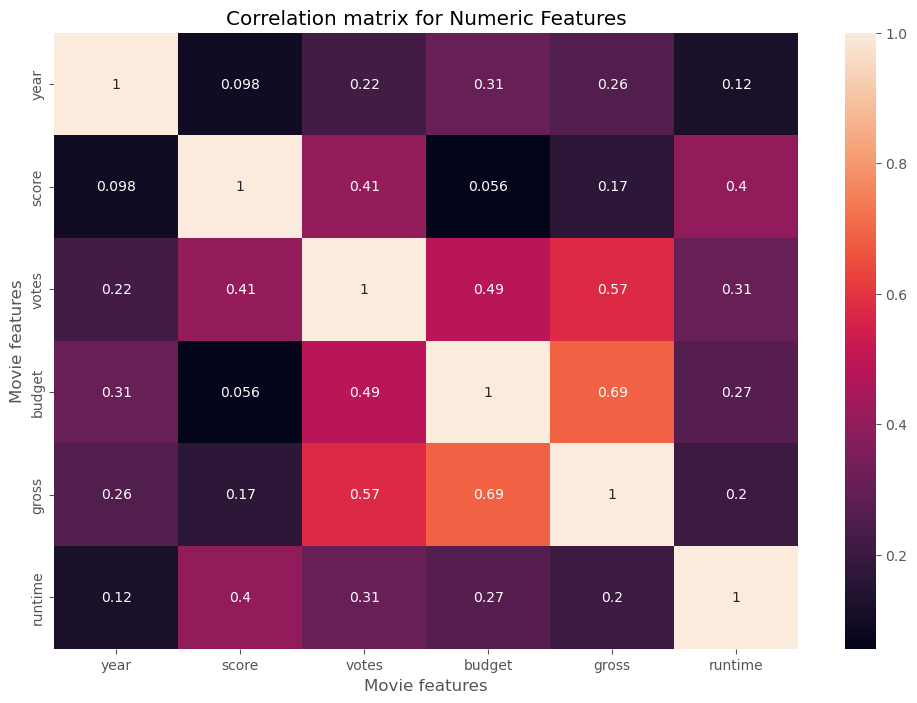

In [10]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [11]:
df_numerized = df
df_numerized = df_numerized.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


In [12]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174,-0.027606


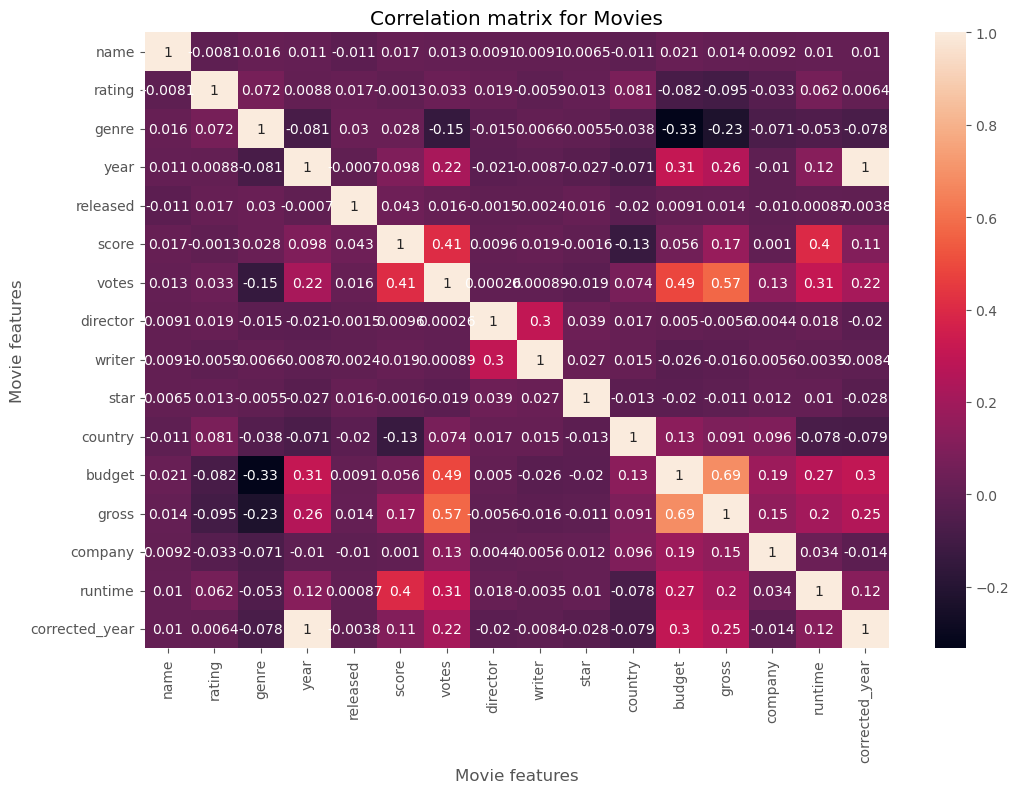

In [13]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [14]:
corr_pairs = correlation_matrix.unstack()

corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released         -0.011311
                score             0.017097
                votes             0.013088
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.020548
                gross             0.013895
                company           0.009211
                runtime           0.010392
                corrected_year    0.010225
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                year              0.008779
                released          0.016613
                score            -0.001314
                votes             0.033225
           

In [15]:
sorted_pairs = corr_pairs.sort_values()

print(sorted_pairs)

genre           budget           -0.334021
budget          genre            -0.334021
gross           genre            -0.229534
genre           gross            -0.229534
votes           genre            -0.145307
genre           votes            -0.145307
score           country          -0.133348
country         score            -0.133348
rating          gross            -0.095355
gross           rating           -0.095355
rating          budget           -0.081939
budget          rating           -0.081939
genre           year             -0.081261
year            genre            -0.081261
corrected_year  country          -0.079009
country         corrected_year   -0.079009
runtime         country          -0.078412
country         runtime          -0.078412
corrected_year  genre            -0.078210
genre           corrected_year   -0.078210
                company          -0.071067
company         genre            -0.071067
country         year             -0.070938
year       

In [16]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[ abs(sorted_pairs) > 0.5]

print(strong_pairs)

# So, we found out gross is highly correlated to votes: 0.573889 and budget: 0.687124

votes           gross             0.573889
gross           votes             0.573889
budget          gross             0.687124
gross           budget            0.687124
year            corrected_year    0.996397
corrected_year  year              0.996397
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
corrected_year  corrected_year    1.000000
dtype: float64


In [17]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Walt Disney Pictures         36327887792
Twentieth Century Fox        30913193094
New Line Cinema              19883797684
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Marvel Studios               10120607435
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [18]:
df.groupby(['company', 'year'])[["gross"]].sum().head()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906


In [19]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company               year
Walt Disney Pictures  2019    5773131804
Marvel Studios        2018    4018631866
Universal Pictures    2015    3834354888
Walt Disney Pictures  2017    3789382071
Paramount Pictures    2011    3565705182
Warner Bros.          2010    3300479986
                      2011    3223799224
Walt Disney Pictures  2010    3104474158
Paramount Pictures    2014    3071298586
Columbia Pictures     2006    2934631933
                      2019    2932757449
Warner Bros.          2018    2774168962
Columbia Pictures     2011    2738363306
Warner Bros.          2005    2688767210
                      2004    2662920386
Name: gross, dtype: int64